In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings('ignore')

In [80]:
df=pd.read_excel('C:\\Users\\rashi\\Desktop\\Coders\\CSV\\titanic.xlsx', index_col=0)

In [81]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [82]:
df.shape

(891, 11)

In [83]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Amount of Nulls in Data

<AxesSubplot:>

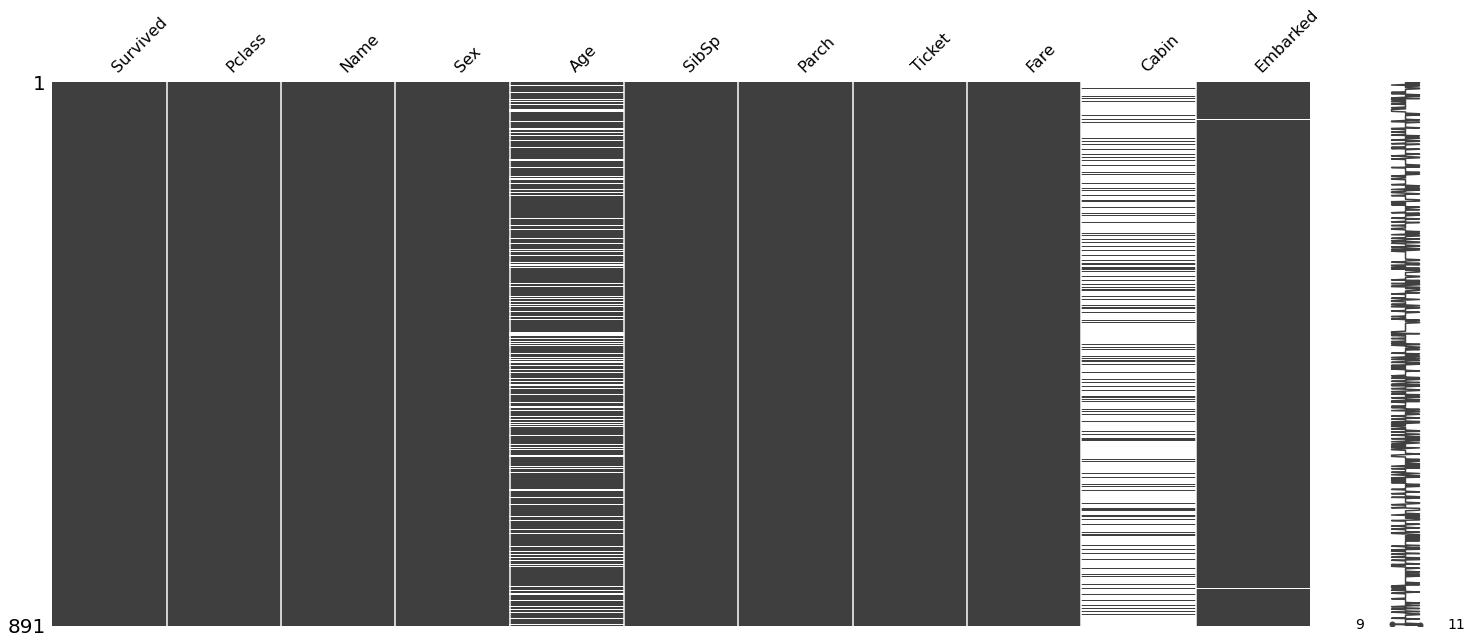

In [86]:
msn.matrix(df)

<AxesSubplot:>

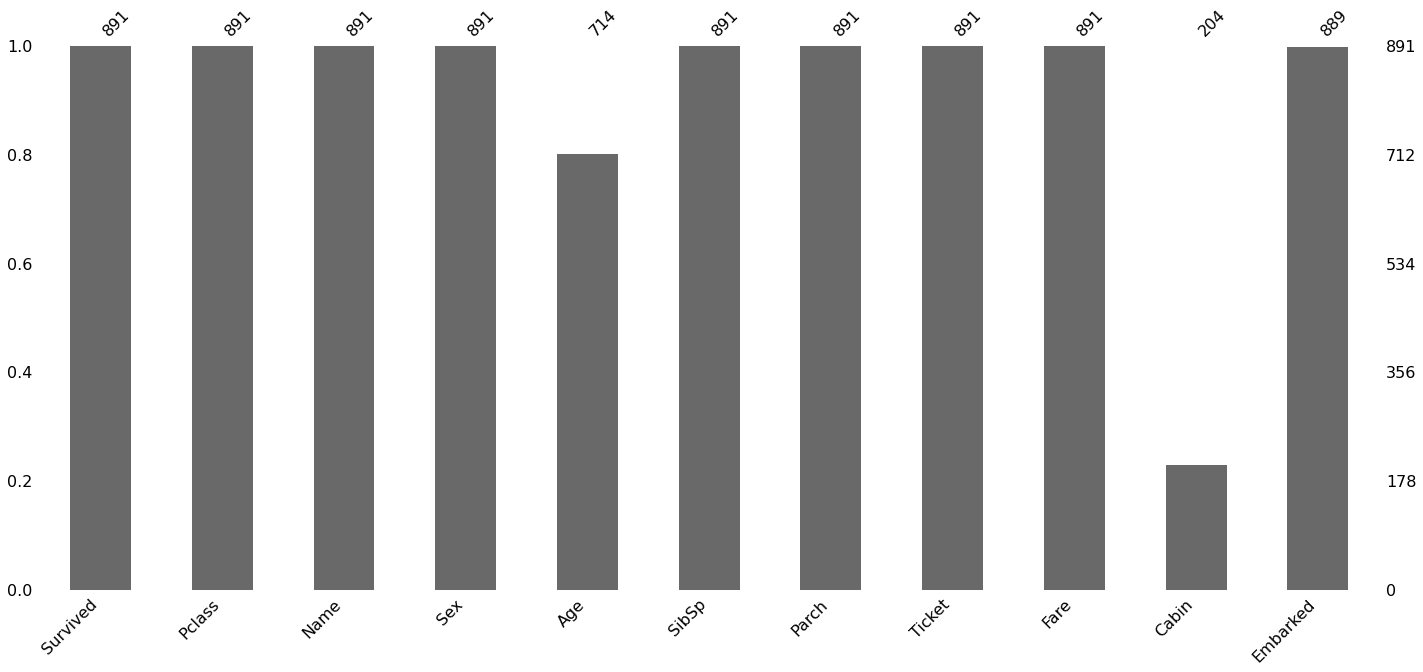

In [87]:
msn.bar(df)


In [88]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [89]:
df['Age'].head(10) # Age Column looks useless for prediction!

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [90]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [101]:
###############################################################################################################################

In [91]:
df['Cabin'].isna().sum()/len(df['Cabin']) #77% of Cabin data are nulls, so it is also useless.

0.7710437710437711

In [92]:
df['Cabin'].fillna(df['Cabin'].mode()[0].split()[0], inplace=True)

In [93]:
len(df['Cabin'].unique())

148

In [94]:
df['Cabin'].notnull().sum()

891

In [95]:
df['Embarked'].mode()[0] # S is the most spreated.

'S'

In [96]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [97]:
df.isna().sum() # Nulls are cleaned

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [98]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96,S


In [103]:
numeric_cols=df._get_numeric_data().columns
categoric_cols=list(set(df.columns)-set(numeric_cols))

# Vizualization

<Figure size 1440x1440 with 0 Axes>

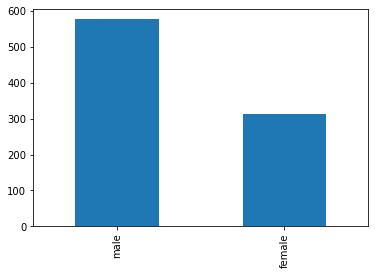

<Figure size 1440x1440 with 0 Axes>

In [108]:
df['Sex'].value_counts().plot.bar()
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

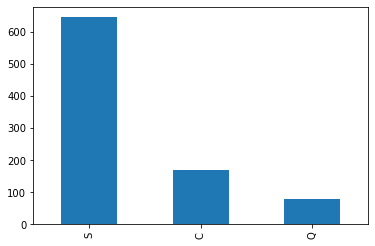

<Figure size 1440x1440 with 0 Axes>

In [109]:
df['Embarked'].value_counts().plot.bar()
plt.figure(figsize=(20,20))

<AxesSubplot:ylabel='Parch'>

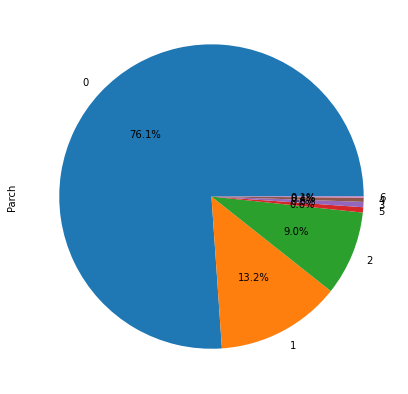

In [122]:
plt.figure(figsize=(7,7))
df.Parch.value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='Survived'>

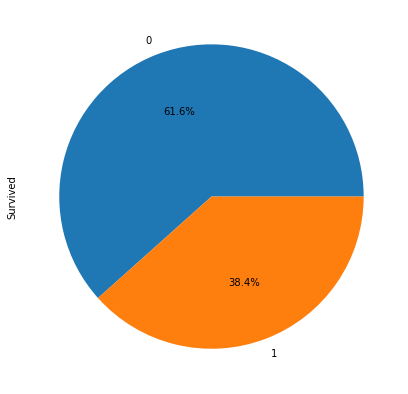

In [124]:
plt.figure(figsize=(7,7))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

(array([0, 1, 2]), [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')])

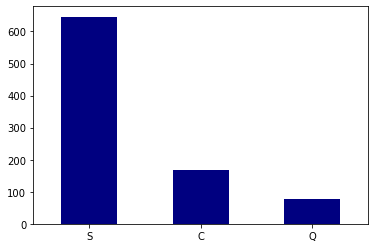

In [125]:
df['Embarked'].value_counts().plot.bar(color='navy')
plt.xticks(rotation='horizontal')

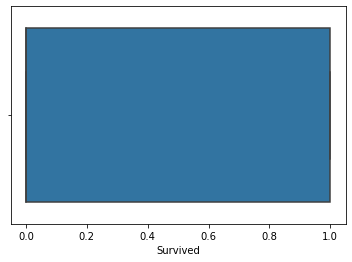

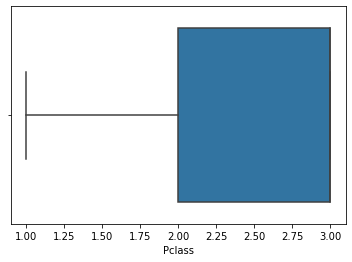

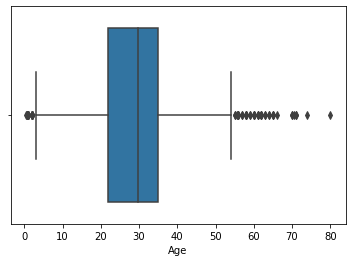

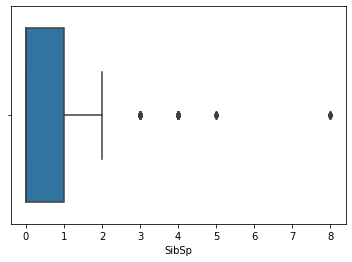

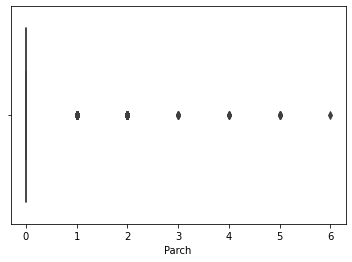

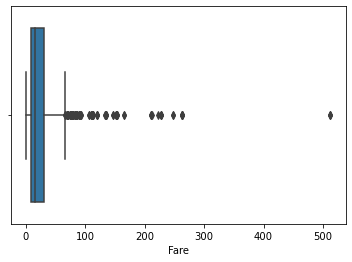

In [126]:
for col in numeric_cols:
    sns.boxplot(df[col])
    plt.show()

# Survived Analytics

In [136]:
df['Survived'].sum() # 342 Out of the 891 survived

342

In [138]:
df.agg({'Age':['max', 'min', 'median', 'mean']}).T

,max,min,median,mean
Age,80.0,0.42,29.699118,29.699118


In [149]:
def age(i):
    if i<=20:
        return 'Young'
    elif i<= 40 and i>=20:
        return 'Adult'
    elif i<=60 and i>=40:
        return 'middle'
    else:
        return 'old'

In [150]:
df['Age group']=df['Age'].map(age)

<AxesSubplot:ylabel='Age group'>

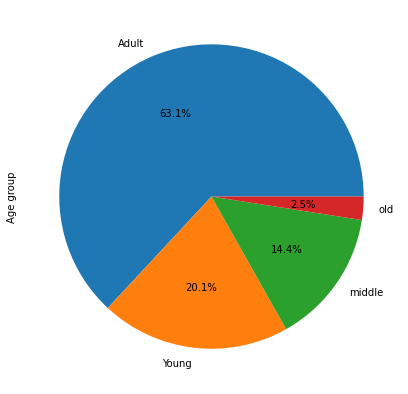

In [151]:
plt.figure(figsize=(7,7))
df['Age group'].value_counts().plot.pie(autopct='%1.1f%%')

In [152]:
df[(df['Survived']==1) & (df['Age']<20)]['Survived'].sum() #Young 

79

In [154]:
df[(df['Survived']==1) & (df['Age']>20) & (df['Age']<40)]['Survived'].sum() #Adult

199

In [155]:
df[(df['Survived']==1) & (df['Age']>40) & (df['Age']<60)]['Survived'].sum() #Middle

48

In [158]:
df[(df['Survived']==1) & (df['Age']>60)]['Survived'].sum() #Old

5

In [142]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96,S,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96,S,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96,S,Adult
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96,Q,Adult
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,middle
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,B96,S,Young
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,B96,S,Adult


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
